In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import scipy.stats as st
import csv
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from datetime import datetime

file_to_output = os.path.join("project-1", "output.csv")

In [2]:
#URL Bases and Filters
url = "https://www.fema.gov/api/open/v2/HazardMitigationGrantProgramDisasterSummaries"
urlv1 = "https://www.fema.gov/api/open/v1/FemaWebDisasterSummaries"
urlv2 ="https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"


filters1 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Severe Storm'"
filters2 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and (incidentType eq 'Hurricane' or incidentType eq 'Typhoon')" 
filters3 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Fire'" 
filters4 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and incidentType eq 'Flood'" 
filters5 = "$filter=declarationDate gt '2003-12-31T04:00:00.000z' and (incidentType eq 'Severe Ice Storm' or incidentType eq 'Snow Storm' or incidentType eq 'Winter Storm' or incidentType eq 'Freezing' or incidentType eq 'Coastal Storm' or incidentType eq 'Tropical Storm')"


In [3]:
# Send a GET request to the API
response1 = requests.get(f"{url}?{filters1}")
response1

<Response [200]>

In [4]:
# Check if the request was successful
if response1.status_code == 200:
    # Parse the JSON data
    data = response1.json()
    
    # Extract the list of disaster declarations
    #disasters = data.get('DisasterDeclarationsSummaries', [])
    #disasters = data.get('FemaWebDisasterSummaries',[])
    disasters = data.get('HazardMitigationGrantProgramDisasterSummaries',[])
    
    # Create a DataFrame from the list of disaster records
    severe_df = pd.DataFrame(disasters)
    severe_df = severe_df.iloc[:, [0,1,2,3,4,5,6,8,10,13,23,24,25,26,27,28,29,31]]
    # Display the DataFrame
    severe_df
else:
    print(f"Error: {response1.status_code}")

# Convert declarationDate to datetime
severe_df['declarationDate'] = pd.to_datetime(severe_df['declarationDate'])

# Create a new column with the desired format
severe_df['Year'] = severe_df['declarationDate'].dt.strftime('%Y')


severe_df

,disasterNumber,declarationDate,disasterType,incidentType,title,region,state,hmgpCloseoutStatus,hmgpReconciliationDate,hmgpPopEndDate,obligatedTotalAmount,obligatedInitiativeAmount,obligatedPlanningAmount,obligatedRegularAmount,obligatedRecipientAdmin,obligatedSubrecipientAdmin,obligatedRecipientMgmtAmt,pendingProjectsQuantity,Year
0,4162,2014-01-23 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND FLOODING",10,Alaska,Open,None,None,3746768.00,0.0,0.0,3529628.00,0,0,217140.0,0.0,2014
1,1618,2005-12-09 00:00:00+00:00,DR,Severe Storm,"SEVERE FALL STORM, TIDAL SURGES, AND FLOODING",10,Alaska,Closed,2010-06-18T00:00:00.000Z,None,155550.00,0.0,0.0,124826.00,4330,4362,22032.0,0.0,2005
2,4050,2011-12-22 00:00:00+00:00,DR,Severe Storm,SEVERE WINTER STORMS AND FLOODING,10,Alaska,Closed,2017-07-10T00:00:00.000Z,None,227656.00,0.0,0.0,217021.00,0,0,10635.0,0.0,2011
3,4094,2012-11-27 00:00:00+00:00,DR,Severe Storm,"SEVERE STORM, STRAIGHT-LINE WINDS, FLOODING, A...",10,Alaska,Open,None,None,3460326.02,0.0,0.0,3296906.02,0,0,163420.0,0.0,2012
4,4054,2012-02-02 00:00:00+00:00,DR,Severe Storm,SEVERE STORM,10,Alaska,Closed,2017-07-06T00:00:00.000Z,None,182646.00,0.0,0.0,172666.00,0,0,9980.0,0.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,1704,2007-05-25 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND INLAND AND COASTAL FLOODING,1,Rhode Island,Closed,2015-09-30T00:00:00.000Z,None,31532.00,0.0,0.0,29437.00,918,1177,0.0,0.0,2007
697,4141,2013-08-08 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, FLOODING, AND MUDSLIDES",5,Wisconsin,Closed,2019-12-19T00:00:00.000Z,None,936757.00,3100.0,50083.0,831191.00,0,0,52383.0,0.0,2013
698,1933,2010-08-11 00:00:00+00:00,DR,Severe Storm,"SEVERE STORMS, TORNADOES, AND FLOODING",5,Wisconsin,Closed,2020-05-22T00:00:00.000Z,None,11179104.00,68849.0,508837.0,9943871.00,0,0,657547.0,0.0,2010
699,1719,2007-08-26 00:00:00+00:00,DR,Severe Storm,SEVERE STORMS AND FLOODING,5,Wisconsin,Closed,2014-04-10T00:00:00.000Z,None,3247237.00,93854.0,85192.0,2854522.00,12068,78355,123246.0,0.0,2007


In [5]:
severe_df["Year"].value_counts()

Year
2010    57
2008    57
2007    56
2011    50
2009    47
2006    45
2004    44
2024    38
2013    34
2023    30
2005    29
2019    27
2017    26
2012    26
2022    24
2014    23
2015    23
2020    19
2018    17
2016    16
2021    13
Name: count, dtype: int64

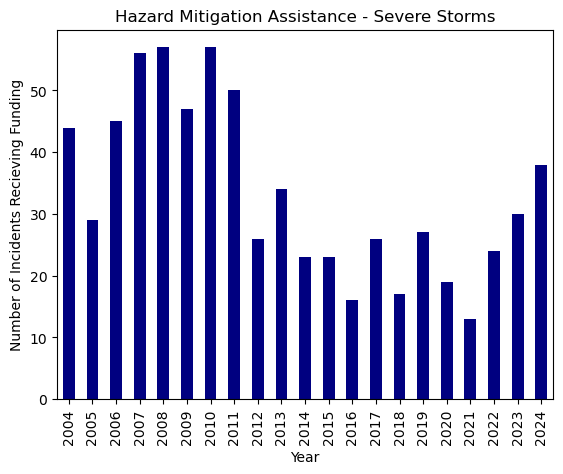

In [6]:
### SEVERE STORM FREQUENCY ###
# 20-year range List
years = []
for x in range(4,25):
    year = 2000 + x
    years.append(year)

frequency = severe_df["Year"].value_counts().sort_index()
ax = frequency.plot(kind='bar', color= "navy")
plt.xticks(range(len(years)), rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Incidents Recieving Funding")
plt.title("Hazard Mitigation Assistance - Severe Storms")
plt.show()

In [24]:
response2 = requests.get(f"{urlv2}?{filters1}")
response2

<Response [200]>

In [29]:
# Check if the request was successful
if response2.status_code == 200:
    # Parse the JSON data
    data = response2.json()
    
    # Extract the list of disaster declarations
    disasters = data.get('DisasterDeclarationsSummaries', [])
    
    # Create a DataFrame from the list of disaster records
    severe_df2 = pd.DataFrame(disasters)
    severe_df2 = severe_df2.iloc[:, [1,2,4,6,7,11]]
    
    # Display the DataFrame
    severe_df2
else:
    print(f"Error: {response2.status_code}")

# Convert declarationDate to datetime
severe_df2['declarationDate'] = pd.to_datetime(severe_df2['declarationDate'])

# Create a new column with the desired format
severe_df2['Year'] = severe_df2['declarationDate'].dt.strftime('%Y')


severe_df2.drop_duplicates(subset = ["disasterNumber"], keep = "first", inplace = True)
severe_df2

,disasterNumber,state,declarationDate,incidentType,declarationTitle,hmProgramDeclared,Year
0,4796,IA,2024-06-24 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, STRAIGHT-LINE WINDS, ...",True,2024
3,4812,NH,2024-08-20 00:00:00+00:00,Severe Storm,SEVERE STORM AND FLOODING,True,2024
5,4811,KS,2024-08-20 00:00:00+00:00,Severe Storm,"SEVERE STORM, STRAIGHT-LINE WINDS, TORNADOES, ...",True,2024
19,4808,NE,2024-08-20 00:00:00+00:00,Severe Storm,"SEVERE STORMS, STRAIGHT-LINE WINDS, TORNADOES,...",True,2024
36,4804,KY,2024-07-23 00:00:00+00:00,Severe Storm,"SEVERE STORMS, STRAIGHT-LINE WINDS, TORNADOES,...",True,2024
...,...,...,...,...,...,...,...
939,4656,SD,2022-06-29 00:00:00+00:00,Severe Storm,"SEVERE STORM, STRAIGHT-LINE WINDS, TORNADOES, ...",True,2022
961,4648,AK,2022-03-24 00:00:00+00:00,Severe Storm,SEVERE WINTER STORM AND STRAIGHT-LINE WINDS,True,2022
964,4646,AK,2022-03-14 00:00:00+00:00,Severe Storm,SEVERE WINTER STORM AND STRAIGHT-LINE WINDS,True,2022
965,4645,TN,2022-03-11 00:00:00+00:00,Severe Storm,SEVERE WINTER STORM,True,2022


In [28]:
severe_df2["Year"].value_counts()

TypeError: 'NoneType' object is not subscriptable

In [14]:
filters11 = "$filter=declarationDate le '2022-01-01T04:00:00.000z' and incidentType eq 'Severe Storm'"

response3 = requests.get(f"{urlv2}?{filters11}")
response3

<Response [200]>

In [15]:
# Check if the request was successful
if response3.status_code == 200:
    # Parse the JSON data
    data = response3.json()
    
    # Extract the list of disaster declarations
    disasters = data.get('DisasterDeclarationsSummaries', [])
    
    # Create a DataFrame from the list of disaster records
    severe_df3 = pd.DataFrame(disasters)
    severe_df3 = severe_df3.iloc[:, [1,2,4,6,7,11]]
    
    # Display the DataFrame
    severe_df3
else:
    print(f"Error: {response3.status_code}")

# Convert declarationDate to datetime
severe_df3['declarationDate'] = pd.to_datetime(severe_df3['declarationDate'])

# Create a new column with the desired format
severe_df3['Year'] = severe_df3['declarationDate'].dt.strftime('%Y')


severe_df3

,disasterNumber,state,declarationDate,incidentType,declarationTitle,hmProgramDeclared,Year
0,4632,AL,2021-12-21 00:00:00+00:00,Severe Storm,SEVERE STORMS AND FLOODING,True,2021
1,4632,AL,2021-12-21 00:00:00+00:00,Severe Storm,SEVERE STORMS AND FLOODING,True,2021
2,4622,NH,2021-09-30 00:00:00+00:00,Severe Storm,SEVERE STORM AND FLOODING,True,2021
3,4616,NE,2021-09-06 00:00:00+00:00,Severe Storm,SEVERE STORMS AND STRAIGHT-LINE WINDS,True,2021
4,4616,NE,2021-09-06 00:00:00+00:00,Severe Storm,SEVERE STORMS AND STRAIGHT-LINE WINDS,True,2021
...,...,...,...,...,...,...,...
995,4331,WV,2017-08-18 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2017
996,4331,WV,2017-08-18 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2017
997,4331,WV,2017-08-18 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2017
998,4331,WV,2017-08-18 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2017


In [16]:
severe_df3["Year"].value_counts()

Year
2019    496
2020    257
2021    121
2018     98
2017     28
Name: count, dtype: int64

In [13]:
filters111 = "$filter=declarationDate le '2007-01-01T04:00:00.000z' and declarationDate ge '2004-01-01T04:00:00.000z' and incidentType eq 'Severe Storm'"

response4 = requests.get(f"{urlv2}?{filters111}")
response4

<Response [200]>

In [18]:
# Check if the request was successful
if response4.status_code == 200:
    # Parse the JSON data
    data = response4.json()
    
    # Extract the list of disaster declarations
    disasters = data.get('DisasterDeclarationsSummaries', [])
    
    # Create a DataFrame from the list of disaster records
    severe_df4 = pd.DataFrame(disasters)
    severe_df4 = severe_df4.iloc[:, [1,2,4,6,7,11]]
    
    # Display the DataFrame
    severe_df4
else:
    print(f"Error: {response2.status_code}")

# Convert declarationDate to datetime
severe_df4['declarationDate'] = pd.to_datetime(severe_df4['declarationDate'])

# Create a new column with the desired format
severe_df4['Year'] = severe_df4['declarationDate'].dt.strftime('%Y')


severe_df4 = severe_df

,disasterNumber,state,declarationDate,incidentType,declarationTitle,hmProgramDeclared,Year
0,1671,WA,2006-12-12 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2006
1,1671,WA,2006-12-12 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2006
2,1671,WA,2006-12-12 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2006
3,1671,WA,2006-12-12 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2006
4,1671,WA,2006-12-12 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, LANDSLIDES, AND MUDSL...",True,2006
...,...,...,...,...,...,...,...
995,1558,WV,2004-09-20 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, AND LANDSLIDES",True,2004
996,1558,WV,2004-09-20 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, AND LANDSLIDES",True,2004
997,1558,WV,2004-09-20 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, AND LANDSLIDES",True,2004
998,1558,WV,2004-09-20 00:00:00+00:00,Severe Storm,"SEVERE STORMS, FLOODING, AND LANDSLIDES",True,2004


In [19]:
severe_df3["Year"].value_counts()

Year
2019    496
2020    257
2021    121
2018     98
2017     28
Name: count, dtype: int64

In [ ]:
#Concat Dataframes Vertically

stacked_df = pd.concat([severe_df3, severe_df3, severe_df3], ignore_index=True)